Loaded data shape: (68, 151)
        0         1         2         3         4         5         6    \
0  0.442507  0.147961  0.251555 -0.050456 -0.058221  0.016061 -0.159148   
1  0.105713  0.162756  0.037949  0.674762 -1.106765 -0.086191  0.195564   
2  0.641389  0.302759  0.168820 -0.139256 -0.304536 -0.005896 -0.057629   
3  0.246458  0.293482  0.233308  0.032990 -0.200990 -0.320651 -0.201111   
4  0.048577 -0.138497  0.085399  0.813775  0.424469  0.208122 -0.334141   

        7         8         9    ...       141       142       143       144  \
0  0.215143  0.284032 -0.018152  ...  0.121452  0.278925  0.169864  0.188662   
1  0.019500 -0.425388 -0.068990  ...  0.577663 -0.125619  0.437590 -0.147249   
2 -0.300367 -0.099419 -0.082095  ...  0.158660  0.188627  0.046148  0.123691   
3 -0.496036 -0.537088  0.207604  ... -0.361225 -0.234816 -0.407649 -0.303477   
4 -0.406708 -0.141707 -0.459845  ...  0.069292 -0.569003  0.713111 -0.581060   

        145       146       147       1

C:\Users\thaplood2\AppData\Local\Temp\1\ipykernel_8520\3318552736.py:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  time_series_data = pd.read_csv(file_path, delim_whitespace=True, header=None)


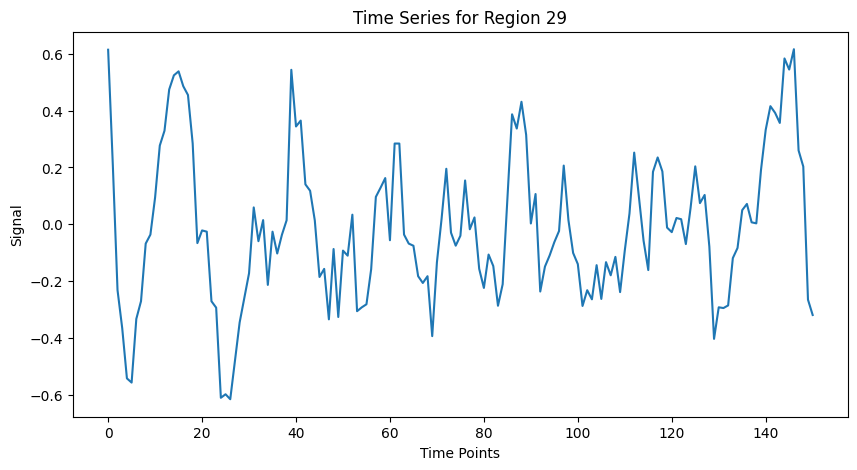

In [33]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the Time Series Data
# Assuming the file is a simple space or tab-delimited text file, we can use pandas to load it
file_path = 'C:/Users/thaplood2/Desktop/Testing/std.20.aparc35.ts.wb.1D.dset'
time_series_data = pd.read_csv(file_path, delim_whitespace=True, header=None)

# Print the shape and inspect the data (should be 68 regions x 153 time points)
print(f"Loaded data shape: {time_series_data.shape}")
print(time_series_data.head())

# Step 2: Choose the Region of Interest
# Let's assume you want to focus on region 0 (can change this to any region index between 0 and 67)
region_idx = 29
region_time_series = time_series_data.iloc[region_idx, :]

# Check the time series for the selected region
print(f"Time series for region {region_idx}:")
print(region_time_series.head())

# Step 3: Visualize the time series for the selected region
plt.figure(figsize=(10, 5))
plt.plot(region_time_series)
plt.title(f'Time Series for Region {region_idx}')
plt.xlabel('Time Points')
plt.ylabel('Signal')
plt.show()



In [34]:
def perform_jackknife_resampling(region_ts, output_dir):
    """
    Perform jackknife resampling on the time series of a single region,
    removing one time point at a time, and save the results as CSV files.
    
    Parameters:
    - region_ts: Series with the time series of the selected region (151 time points)
    - output_dir: Directory where the CSV files will be saved
    
    Returns:
    - jackknife_samples: A list of DataFrames, each representing the time series after removing one time point
    """
    num_time_points = region_ts.shape[0]  # 151 time points
    jackknife_samples = []

    # Create the output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Loop over all time points and remove them one by one
    for time_point_to_remove in range(num_time_points):
        # Remove the selected time point from the region's time series
        jackknife_sample = region_ts.drop(index=[time_point_to_remove])
        
        # Print the shape of the remaining time series
        print(f"Remaining time series shape after removing time point {time_point_to_remove}: {jackknife_sample.shape}")

        # Save the jackknife sample as a CSV file
        jackknife_sample_csv_path = os.path.join(output_dir, f'jackknife_sample_{time_point_to_remove}.csv')
        jackknife_sample.to_csv(jackknife_sample_csv_path, index=False, header=False)
        print(f"Jackknife sample (after removing time point {time_point_to_remove}) saved at: {jackknife_sample_csv_path}")
        
        # Store the resulting jackknife sample
        jackknife_samples.append(jackknife_sample)
    
    return jackknife_samples

# Example usage of the function (assuming region_time_series is defined):
output_dir = 'C:/Users/thaplood2/Desktop/Testing/100206_region_29'  # Update this path as needed
jackknife_samples = perform_jackknife_resampling(region_time_series, output_dir)

# Output the jackknife samples
for idx, sample in enumerate(jackknife_samples):
    print(f"Jackknife sample {idx}:\n{sample}\n")


Remaining time series shape after removing time point 0: (150,)
Jackknife sample (after removing time point 0) saved at: C:/Users/thaplood2/Desktop/Testing/100206_region_29\jackknife_sample_0.csv
Remaining time series shape after removing time point 1: (150,)
Jackknife sample (after removing time point 1) saved at: C:/Users/thaplood2/Desktop/Testing/100206_region_29\jackknife_sample_1.csv
Remaining time series shape after removing time point 2: (150,)
Jackknife sample (after removing time point 2) saved at: C:/Users/thaplood2/Desktop/Testing/100206_region_29\jackknife_sample_2.csv
Remaining time series shape after removing time point 3: (150,)
Jackknife sample (after removing time point 3) saved at: C:/Users/thaplood2/Desktop/Testing/100206_region_29\jackknife_sample_3.csv
Remaining time series shape after removing time point 4: (150,)
Jackknife sample (after removing time point 4) saved at: C:/Users/thaplood2/Desktop/Testing/100206_region_29\jackknife_sample_4.csv
Remaining time serie

In [35]:
import os
import pandas as pd
import numpy as np

def load_jackknife_samples(file_paths):
    """
    Load jackknife samples from CSV files.
    
    Parameters:
    - file_paths: List of paths to the CSV files for the jackknife samples
    
    Returns:
    - samples: List of DataFrames loaded from the CSV files
    """
    samples = [pd.read_csv(file, header=None) for file in file_paths]
    return samples

def calculate_correlation_between_regions(region1_files, region2_files, output_file):
    """
    Calculate correlation between the time series of two regions after jackknife resampling
    and output the results in a single CSV file.
    
    Parameters:
    - region1_files: List of paths to CSV files for region 1 jackknife samples
    - region2_files: List of paths to CSV files for region 2 jackknife samples
    - output_file: Path to the CSV file where correlation results will be saved
    
    Returns:
    - correlations: List of correlation values between region 1 and region 2 for each jackknife sample
    """
    correlations = []

    # Ensure both regions have the same number of jackknife files
    assert len(region1_files) == len(region2_files), "Mismatch in the number of jackknife sample files between regions."

    # Load jackknife samples
    region1_samples = load_jackknife_samples(region1_files)
    region2_samples = load_jackknife_samples(region2_files)

    # Loop through each pair of jackknife samples and calculate correlation
    for i, (sample1, sample2) in enumerate(zip(region1_samples, region2_samples)):
        # Convert samples to numpy arrays for correlation calculation
        sample1_array = np.array(sample1).flatten()
        sample2_array = np.array(sample2).flatten()

        # Calculate Pearson correlation between region 1 and region 2 jackknife samples
        corr = np.corrcoef(sample1_array, sample2_array)[0, 1]
        correlations.append(corr)

        # Print correlation result
        print(f"Correlation (after removing time point {i}): {corr}")

    # Save all correlation values to a single CSV file
    corr_df = pd.DataFrame(correlations, columns=['Correlation'])
    corr_df.to_csv(output_file, index_label='Time Point Removed')
    print(f"All correlations saved at: {output_file}")

    return correlations

# Example usage:
region1_dir = 'C:/Users/thaplood2/Desktop/Testing/100206_region_1//'  # Directory with CSV files for region 1
region2_dir = 'C:/Users/thaplood2/Desktop/Testing/100206_region_29//'  # Directory with CSV files for region 2
output_file = 'C:/Users/thaplood2/Desktop/Testing/correlation_region1_region29.csv'  # Single output CSV file

# Get the list of CSV files for both regions
region1_files = [os.path.join(region1_dir, f) for f in sorted(os.listdir(region1_dir)) if f.endswith('.csv')]
region2_files = [os.path.join(region2_dir, f) for f in sorted(os.listdir(region2_dir)) if f.endswith('.csv')]

# Calculate correlations between the jackknife samples for region 1 and region 2
correlations = calculate_correlation_between_regions(region1_files, region2_files, output_file)

# Output the correlations
print("Correlations between region 1 and region 2 for each jackknife sample:\n", correlations)



Correlation (after removing time point 0): 0.10199778044775173
Correlation (after removing time point 1): 0.11472337105116627
Correlation (after removing time point 2): 0.11573484886901754
Correlation (after removing time point 3): 0.1262147512966532
Correlation (after removing time point 4): 0.13862166988318114
Correlation (after removing time point 5): 0.13280773833828433
Correlation (after removing time point 6): 0.13208596235470269
Correlation (after removing time point 7): 0.12610044737576528
Correlation (after removing time point 8): 0.12934323563154979
Correlation (after removing time point 9): 0.11952994244222702
Correlation (after removing time point 10): 0.11696850272292099
Correlation (after removing time point 11): 0.11782071169390686
Correlation (after removing time point 12): 0.11725337040635132
Correlation (after removing time point 13): 0.11232936448924076
Correlation (after removing time point 14): 0.11605506558019955
Correlation (after removing time point 15): 0.11474

In [53]:
import numpy as np
from scipy.stats import pearsonr
# Load the actual dataset
ts_all = np.loadtxt('C:/Users/thaplood2/Desktop/Testing/std.20.aparc35.ts.wb.1D.dset')



In [54]:
ts_all.shape

(68, 151)

In [45]:
for i in range(ts_all.shape[1]):
    tmp1 = np.delete(ts_all, i, 1)

tmp1

array([[ 4.42506783e-01,  1.47960768e-01,  2.51555168e-01, ...,
         4.16644220e-01,  3.34625384e-01,  5.05845039e-01],
       [ 1.05712899e-01,  1.62756096e-01,  3.79488371e-02, ...,
         3.78587196e-01,  3.17324002e-01,  4.57887806e-01],
       [ 6.41389388e-01,  3.02759392e-01,  1.68819982e-01, ...,
         3.41548861e-01,  5.12588943e-01,  2.46543719e-01],
       ...,
       [-2.10865483e-02,  2.57323291e-01,  5.44145753e-01, ...,
         6.07211423e-01,  3.29084636e-01,  7.61928596e-02],
       [-8.29711610e-02, -6.63326832e-01,  4.27061899e-04, ...,
         3.53743890e-01,  4.95499387e-01,  1.27190451e-01],
       [ 9.73410705e-02, -2.84906251e-01,  2.65897577e-01, ...,
         2.40298821e-01,  3.09415530e-01,  1.08857644e-01]])

In [46]:
for i in range(ts_all.shape[1]-1):
    tmp2 = np.delete(ts_all, i-1, 1)

tmp2

array([[ 4.42506783e-01,  1.47960768e-01,  2.51555168e-01, ...,
         4.16644220e-01,  5.05845039e-01,  2.74460936e-01],
       [ 1.05712899e-01,  1.62756096e-01,  3.79488371e-02, ...,
         3.78587196e-01,  4.57887806e-01,  3.34033109e-01],
       [ 6.41389388e-01,  3.02759392e-01,  1.68819982e-01, ...,
         3.41548861e-01,  2.46543719e-01,  9.55386100e-02],
       ...,
       [-2.10865483e-02,  2.57323291e-01,  5.44145753e-01, ...,
         6.07211423e-01,  7.61928596e-02, -3.96156499e-01],
       [-8.29711610e-02, -6.63326832e-01,  4.27061899e-04, ...,
         3.53743890e-01,  1.27190451e-01,  5.49587001e-01],
       [ 9.73410705e-02, -2.84906251e-01,  2.65897577e-01, ...,
         2.40298821e-01,  1.08857644e-01, -5.92449866e-01]])

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

def matrix_pearsonr(ts):
    ts_row_num = ts.shape[0]
    C = np.zeros(shape=(ts_row_num, ts_row_num))
    P = np.zeros(shape=(ts_row_num, ts_row_num))
    for i in range(ts_row_num):
        for j in range(ts_row_num):
            C[i, j], P[i, j] = pearsonr(ts[i,:], ts[j,:])
          
    return C, P
    
def computedJCpearson(ts, n):
    """
    Compute jc correlations
    :param ts: Time-series of MxN
    :param n: num of time points to be deleted
    :return: Correlations, upper-diagonal of correlations and corresponding p-values
    """
    CC = []
    P = []
    for i in range(ts.shape[1]-(n-1)):
        tmp = ts.copy()
        for j in range(n):
            tmp = np.delete(tmp, i, 1)
            print("timepoint: ", i, " # ", j, tmp.shape)
        corrTP, p = matrix_pearsonr(tmp)
        CC.append(corrTP)
        P.append(p)
    
    return np.asarray(CC), np.asarray(P)




In [48]:
cc, p = computedJCpearson(ts_all, 1)

timepoint:  0  #  0 (68, 150)
timepoint:  1  #  0 (68, 150)
timepoint:  2  #  0 (68, 150)
timepoint:  3  #  0 (68, 150)
timepoint:  4  #  0 (68, 150)
timepoint:  5  #  0 (68, 150)
timepoint:  6  #  0 (68, 150)
timepoint:  7  #  0 (68, 150)
timepoint:  8  #  0 (68, 150)
timepoint:  9  #  0 (68, 150)
timepoint:  10  #  0 (68, 150)
timepoint:  11  #  0 (68, 150)
timepoint:  12  #  0 (68, 150)
timepoint:  13  #  0 (68, 150)
timepoint:  14  #  0 (68, 150)
timepoint:  15  #  0 (68, 150)
timepoint:  16  #  0 (68, 150)
timepoint:  17  #  0 (68, 150)
timepoint:  18  #  0 (68, 150)
timepoint:  19  #  0 (68, 150)
timepoint:  20  #  0 (68, 150)
timepoint:  21  #  0 (68, 150)
timepoint:  22  #  0 (68, 150)
timepoint:  23  #  0 (68, 150)
timepoint:  24  #  0 (68, 150)
timepoint:  25  #  0 (68, 150)
timepoint:  26  #  0 (68, 150)
timepoint:  27  #  0 (68, 150)
timepoint:  28  #  0 (68, 150)
timepoint:  29  #  0 (68, 150)
timepoint:  30  #  0 (68, 150)
timepoint:  31  #  0 (68, 150)
timepoint:  32  # 

In [49]:
cc.shape

(151, 68, 68)

In [50]:
p.shape

(151, 68, 68)

In [51]:
cc, p = computedJCpearson(ts_all, 2)

timepoint:  0  #  0 (68, 150)
timepoint:  0  #  1 (68, 149)
timepoint:  1  #  0 (68, 150)
timepoint:  1  #  1 (68, 149)
timepoint:  2  #  0 (68, 150)
timepoint:  2  #  1 (68, 149)
timepoint:  3  #  0 (68, 150)
timepoint:  3  #  1 (68, 149)
timepoint:  4  #  0 (68, 150)
timepoint:  4  #  1 (68, 149)
timepoint:  5  #  0 (68, 150)
timepoint:  5  #  1 (68, 149)
timepoint:  6  #  0 (68, 150)
timepoint:  6  #  1 (68, 149)
timepoint:  7  #  0 (68, 150)
timepoint:  7  #  1 (68, 149)
timepoint:  8  #  0 (68, 150)
timepoint:  8  #  1 (68, 149)
timepoint:  9  #  0 (68, 150)
timepoint:  9  #  1 (68, 149)
timepoint:  10  #  0 (68, 150)
timepoint:  10  #  1 (68, 149)
timepoint:  11  #  0 (68, 150)
timepoint:  11  #  1 (68, 149)
timepoint:  12  #  0 (68, 150)
timepoint:  12  #  1 (68, 149)
timepoint:  13  #  0 (68, 150)
timepoint:  13  #  1 (68, 149)
timepoint:  14  #  0 (68, 150)
timepoint:  14  #  1 (68, 149)
timepoint:  15  #  0 (68, 150)
timepoint:  15  #  1 (68, 149)
timepoint:  16  #  0 (68, 15

In [52]:
cc.shape

(150, 68, 68)

In [8]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr

# Load the actual dataset
ts_all = np.loadtxt('C:/Users/thaplood2/Desktop/Testing/std.20.aparc35.ts.wb.1D.dset')

# Function to compute Pearson correlation matrix and p-values
def matrix_pearsonr(ts):
    ts_row_num = ts.shape[0]
    C = np.zeros(shape=(ts_row_num, ts_row_num))
    P = np.zeros(shape=(ts_row_num, ts_row_num))
    for i in range(ts_row_num):
        for j in range(ts_row_num):
            C[i, j], P[i, j] = pearsonr(ts[i, :], ts[j, :])
    return C, P

# Function to compute jackknife Pearson correlations
def computedJCpearson(ts, n):
    """
    Compute jackknife correlations by deleting 'n' time points.
    :param ts: Time-series of MxN (regions x time points)
    :param n: Number of time points to be deleted at each iteration
    :return: List of correlation matrices and p-values
    """
    CC = []  # To store correlation matrices for each iteration
    P = []   # To store p-values for each iteration
    
    num_iterations = ts.shape[1] - (n - 1)  # Calculate the number of iterations where you can delete 'n' points
    
    for i in range(num_iterations):  # Iterate over possible time point removal windows
        # Create a temporary copy of the original dataset
        tmp = np.delete(ts, slice(i, i + n), axis=1)  # Delete 'n' time points starting at index 'i'
        
        # Print the shape after deletion for debugging
        print(f"Time points deleted: {i}-{i+n-1}, New shape: {tmp.shape}")
        
        # Compute Pearson correlation and p-values on reduced data
        corrTP, p = matrix_pearsonr(tmp)
        CC.append(corrTP)  # Store correlation matrix
        P.append(p)        # Store p-values
    
    return np.asarray(CC), np.asarray(P)

# Example of how to call the function
n = 5  # Number of time points to delete
CC, P = computedJCpearson(ts_all, n)

# Check the shape of the correlation matrices and p-values
print("Shape of CC (correlation matrices):", CC.shape)  # Expect (147, 68, 68) if all time points are processed
print("Shape of P (p-values):", P.shape)  # Expect (147, 68, 68)

# Saving the correlation matrices and p-values to separate CSV files
np.savetxt('jackknife_correlations_5.csv', CC.reshape(-1, CC.shape[1] * CC.shape[2]), delimiter=',')
np.savetxt('jackknife_pvalues_5.csv', P.reshape(-1, P.shape[1] * P.shape[2]), delimiter=',')

print("Jackknife correlations and p-values saved to CSV files.")



Time points deleted: 0-4, New shape: (68, 146)
Time points deleted: 1-5, New shape: (68, 146)
Time points deleted: 2-6, New shape: (68, 146)
Time points deleted: 3-7, New shape: (68, 146)
Time points deleted: 4-8, New shape: (68, 146)
Time points deleted: 5-9, New shape: (68, 146)
Time points deleted: 6-10, New shape: (68, 146)
Time points deleted: 7-11, New shape: (68, 146)
Time points deleted: 8-12, New shape: (68, 146)
Time points deleted: 9-13, New shape: (68, 146)
Time points deleted: 10-14, New shape: (68, 146)
Time points deleted: 11-15, New shape: (68, 146)
Time points deleted: 12-16, New shape: (68, 146)
Time points deleted: 13-17, New shape: (68, 146)
Time points deleted: 14-18, New shape: (68, 146)
Time points deleted: 15-19, New shape: (68, 146)
Time points deleted: 16-20, New shape: (68, 146)
Time points deleted: 17-21, New shape: (68, 146)
Time points deleted: 18-22, New shape: (68, 146)
Time points deleted: 19-23, New shape: (68, 146)
Time points deleted: 20-24, New shap

In [9]:
# Threshold p-value (e.g., p < 0.05)
p_threshold = 0.05

# Filter correlations based on the p-value threshold
filtered_CC = CC.copy()  # Copy the correlation matrix
filtered_CC[P >= p_threshold] = 0  # Set correlations to zero where p-value is above the threshold

# Save the filtered correlations (significant ones only) to a CSV file
np.savetxt('filtered_jackknife_correlations_5.csv', filtered_CC.reshape(-1, CC.shape[1] * CC.shape[2]), delimiter=',')

print(f"Filtered correlations (p < {p_threshold}) saved to 'filtered_jackknife_correlations_5.csv'.")


Filtered correlations (p < 0.05) saved to 'filtered_jackknife_correlations_5.csv'.


In [11]:
import pandas as pd

# Load CSV file
csv_file = "C:/Users/thaplood2/Documents/filtered_jackknife_correlations_5.csv"  # Replace with your actual file path
data = pd.read_csv(csv_file, header=None)

# Print shape of the loaded data
print("Shape of the data from CSV:", data.shape)

Shape of the data from CSV: (147, 4624)


In [12]:
import numpy as np
import pandas as pd

# Load the CSV file (assuming you have already dropped the extra row)
csv_file = "C:/Users/thaplood2/Documents/jackknife_correlations_5.csv"  # Replace with your actual file path
data = pd.read_csv(csv_file, header=None)

# Convert the DataFrame to a NumPy array
data_array = data.values

# Reshape the array into (147, 68, 68)
CC = data_array.reshape((147, 68, 68))

# Now we want to extract the correlation values for all region pairs across the 147 time points

# Initialize a dictionary to store the correlations for each region pair
# The key will be a tuple (region1, region2) and the value will be a list of 147 correlation values
region_pair_correlations = {}

# Loop through each pair of regions
for region1 in range(68):
    for region2 in range(region1, 68):  # Only look at the upper triangle (including the diagonal)
        # Extract correlation values for this region pair across the 147 jackknife samples
        correlation_values = CC[:, region1, region2]
        
        # Store these values in the dictionary
        region_pair_correlations[(region1, region2)] = correlation_values

# Now you have a dictionary `region_pair_correlations` with the correlation values for each region pair

# Optionally, you can save the correlation values for each region pair into a CSV file
with open("region_pair_correlations.csv", "w") as f:
    f.write("Region1,Region2," + ",".join([f"Time{i+1}" for i in range(147)]) + "\n")
    for (region1, region2), values in region_pair_correlations.items():
        f.write(f"{region1},{region2}," + ",".join(map(str, values)) + "\n")

print("Correlation values for each region pair across 147 jackknife samples have been saved to 'region_pair_correlations.csv'.")



Correlation values for each region pair across 147 jackknife samples have been saved to 'region_pair_correlations.csv'.
